<a href="https://colab.research.google.com/github/multi-proj/API/blob/master/NLP/K_means%EB%B6%84%EC%84%9D_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference

- WikiDocs

### File Preprocessing

In [0]:
# xlsx to csv

import xlrd
import csv

def csv_from_excel():
    wb = xlrd.open_workbook('test.xlsx')
    sh = wb.sheet_by_name('test')
    your_csv_file = open('test.csv', 'w')
    wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)

    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))

    your_csv_file.close()

# runs the csv_from_excel function:
csv_from_excel()

In [406]:
import pandas as pd
import numpy as np

!pip install konlpy
from konlpy.tag import Hannanum, Kkma, Komoran, Okt
from gensim.models import Word2Vec
import gensim.models

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

In [0]:
from konlpy.corpus import kobill
from gensim import corpora

### 데이터 불러오기

In [408]:
test_1 = pd.read_csv('test.csv', encoding='utf-8')
# csvreader = csv.reader(x.replace('\0', '') for x in test_1)
test_1 = test_1.fillna('asdf')
test_1.head()

,명칭,소속,왕(인물),왕(시기),유형,분류,행정 구,연도,설명1,설명2
0,지광국사현묘탑,경복궁,문종(고려),문종(고려),승탑,국보,종로구,1075년,1962년 12월 20일 국보 제101호로 지정되었다. 전체 높이는 6.1m이다. ...,지광국사탑은 고려시대 조정이 최고의 승려에게 내리는 법계인 ‘국사’(國師)를 받은 ...
1,홍화문,창경궁,성종,광해군,"궁궐, 궁문",보물,종로구,1484년,"보물 제384호. 우진각지붕집. 정면 3칸, 측면 2칸의 다포계 중층 문루. 148...","정면 3칸, 측면 2칸의 중층(2층) 우진각지붕으로 동쪽으로 향한 점이 특징인 대문..."
2,창녕위궁재사,무덤,순조,순조,"건축, 재사",등록문화재,강북구,1832년,조선 제23대 순조의 둘째 딸 복온공주(福溫公主:1818~1832)와 부마 창녕위(...,"1832년에 복온공주가 세상을 떠난 뒤 무덤이 주변에 자리하였고, 이어서 김병주의 ..."
3,후원,창덕궁,태종,태종,"유적, 정원",사적,종로구,1405년,면적 10만 3000여 평. 사적 제122호로 지정된 창덕궁 안에 있는 조선시대 정...,창덕궁 후원(昌德宮後苑) 또는 비원(祕苑)은 창덕궁 북쪽에 창경궁과 붙어 있는 한국...
4,창빈안씨묘역,국립현충원,숙종,선조,묘,시도유형문화재,동작구,1683년,1983년에 서울시유형문화재 제54호로 지정되었다. 조선 제11대 중종의 후궁(後宮...,창빈 안씨 묘역(昌嬪 安氏 墓域)은 조선 제11대 임금 중종(1488∼1544)의 ...


In [409]:
type(test_1)

pandas.core.frame.DataFrame

### Data Preprocessing

- Concatenate several columns in one

In [410]:
test_1['명칭_유형'] = list(i[-2:] for i in test_1['명칭'])
test_1['명칭_유형'].head()
test_type = test_1['명칭_유형']

use_col = ['명칭', '연도']
'''
use_col_tot = ['명칭', '명칭_유형', '연도', '유형', '왕(인물)', '왕(시기)', '소속', '분류']
use_col_dist = ['명칭', '명칭_유형', '연도', '분류', '유형', '소속']
'''

"\nuse_col_tot = ['명칭', '명칭_유형', '연도', '유형', '왕(인물)', '왕(시기)', '소속', '분류']\nuse_col_dist = ['명칭', '명칭_유형', '연도', '분류', '유형', '소속']\n"

- K-means용 프레임데이터

In [0]:
test_1['설명1'] = test_1['설명1'].apply(hannanum.nouns)

In [412]:
test_1['설명1']
type(test_1['설명1'][0])

list

In [413]:
test_1['설명1'][0]

['1962년',
 '12월',
 '20일',
 '국보',
 '제101호',
 '지정',
 '전체',
 '6.',
 '1m',
 '강원',
 '원주시',
 '부론면(富論面)',
 '법천리(法泉里)',
 '국권침탈',
 '직후',
 '일본',
 '반출',
 '반환',
 '경복궁']

In [414]:
# test_2 = test_1['설명1'].apply(lambda x: x.remove('adsf'))
'''for aa in list(test_1['설명1']) :
  aa.remove("adsf")'''

'for aa in list(test_1[\'설명1\']) :\n  aa.remove("adsf")'

In [415]:
test_sulmyung = test_1['설명1']
# hannanum.nouns(list(i for i in test_1['명칭'])) 

test_sulmyung.head()

0    [1962년, 12월, 20일, 국보, 제101호, 지정, 전체, 6., 1m, 강...
1    [보물, 제384호, 우진각지붕집, 정면, 3칸, 측면, 2칸, 다포계, 중층, 문...
2    [조선, 제23대, 순조, 둘째, 복온공주(福溫公主:1818~1832), 부마, 창...
3    [면적, 10, 3000, 평, 사적, 제122호, 지정, 창덕궁, 안, 조선시대,...
4    [1983년, 서울시유형문화재, 제54호, 지정, 조선, 제11대, 중종, 후궁(後...
Name: 설명1, dtype: object

In [416]:
type(test_sulmyung[0])

list

In [417]:
type(test_1['명칭_유형'][0])

str

#### sub-preprocessing according to 'classification type'

**1. For Overall Classification**

In [0]:
for j in range(0,len(use_col)):
  
  for i in range(len(test_sulmyung)):
    test_sulmyung[i].append(test_1[use_col[j]][i])

In [0]:
test_sulmyung=test_sulmyung.str.join(" ")

In [420]:
test_sulmyung[0]

type(test_sulmyung)

test_sulmyung.dropna(axis=0)

test_sulmyung[0]

'1962년 12월 20일 국보 제101호 지정 전체 6. 1m 강원 원주시 부론면(富論面) 법천리(法泉里) 국권침탈 직후 일본 반출 반환 경복궁 지광국사현묘탑 1075년'

In [421]:
test_sulmyung.shape
# pd.concat([test_sulmyung, test_add], axis=1)    

(121,)

- KNN용 프레임데이터

In [422]:
test_1['설명2'] = test_1['설명2'].apply(hannanum.nouns)
test_sulmyung_knn = test_1['설명2']
test_sulmyung_knn.head()

0    [지광국사탑, 고려시대, 조정, 최고, 승려, 법계, ‘국사’(國師), 지광국사, ...
1    [정면, 3칸, 측면, 2칸, 중, 2층, 우진각지붕, 동쪽, 점, 특징, 대문, ...
2    [1832년, 복온공주, 세상, 뒤, 무덤, 주변, 자리하였고,, 이, 김병주, 무...
3    [창덕궁, 후원(昌德宮後苑), 비원(祕苑), 창덕궁, 북쪽, 창경궁, 한국, 최대,...
4    [창빈, 안씨, 묘역(昌嬪, 安氏, 墓域, 조선, 제11대, 임금, 중종(1488∼...
Name: 설명2, dtype: object

In [423]:
type(test_sulmyung_knn[0])

list

In [0]:
test_sulmyung_knn=test_sulmyung_knn.str.join(" ")

In [425]:
test_sulmyung_knn.shape

(121,)

### Training

In [0]:
from gensim.models import Word2Vec

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier  

In [427]:
type(test_sulmyung)

pandas.core.series.Series

#### K-means

In [428]:
X_train = test_sulmyung
X_train.head()


0    1962년 12월 20일 국보 제101호 지정 전체 6. 1m 강원 원주시 부론면(...
1    보물 제384호 우진각지붕집 정면 3칸 측면 2칸 다포계 중층 문루 1484년(성종...
2    조선 제23대 순조 둘째 복온공주(福溫公主:1818~1832) 부마 창녕위(昌寧尉)...
3    면적 10 3000 평 사적 제122호 지정 창덕궁 안 조선시대 정원 조선왕궁 놀이...
4    1983년 서울시유형문화재 제54호 지정 조선 제11대 중종 후궁(後宮) 선조 할머...
Name: 설명1, dtype: object

In [429]:
tfidf = TfidfVectorizer()
dataset1 = tfidf.fit_transform(X_train)
type(dataset1)
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [0]:
cluster_number = 5
# '소속' 기준으로 cluster_number=13 (제일 정확도 높음)
km1=KMeans(n_clusters=cluster_number)
out1=km1.fit_predict(dataset1)

####  KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [443]:
X2_train = test_sulmyung_knn
X2_train.head()

0    지광국사탑 고려시대 조정 최고 승려 법계 ‘국사’(國師) 지광국사 해린(984∼10...
1    정면 3칸 측면 2칸 중 2층 우진각지붕 동쪽 점 특징 대문 왼쪽 서북쪽 모서리 계...
2    1832년 복온공주 세상 뒤 무덤 주변 자리하였고, 이 김병주 무덤 위치 재사 건립...
3    창덕궁 후원(昌德宮後苑) 비원(祕苑) 창덕궁 북쪽 창경궁 한국 최대 궁중 정원 궁원...
4    창빈 안씨 묘역(昌嬪 安氏 墓域 조선 제11대 임금 중종(1488∼1544) 후궁 ...
Name: 설명2, dtype: object

In [444]:
# training


tfidf = TfidfVectorizer()
dataset2 = tfidf.fit_transform(X2_train)
dataset2.shape

(121, 4049)

### 예측값 정확도 확인하기

In [445]:

# 분류 bins 바꾸려면 cluster_number 지정해주기
out1

array([0, 3, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 4,
       0, 3, 0, 1, 1, 2, 2, 3, 2, 3, 0, 2, 1, 0, 1, 2, 0, 0, 2, 4, 1, 3,
       3, 1, 3, 2, 0, 0, 2, 2, 4, 4, 0, 1, 1, 1, 1, 3, 0, 3, 0, 1, 1, 1,
       0, 0, 0, 3, 2, 2, 4, 3, 1, 0, 0, 2, 0, 2, 2, 1, 3, 0, 1, 1, 1, 3,
       1, 0, 3, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 4, 2, 1, 0, 3, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 3, 2], dtype=int32)

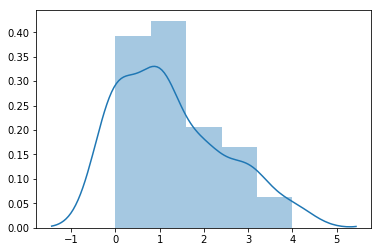

In [446]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# x = np.random.normal(size=100)
sns.distplot(out1, bins=cluster_number); # , fit=stats.gamma

In [449]:
test_1['연도'][out1==2]

3      1405년
6      1395년
7      1737년
8        미확인
9      1661년
15     1770년
25     1737년
26     1609년
34     1405년
36     1405년
42     1412년
45      10세기
55     1847년
56      990년
57     1394년
58     1392년
63     1892년
64      15세기
65     1905년
74      747년
81     1792년
84     1370년
85     1639년
86     1904년
88     1530년
91     1618년
92     1725년
94       미확인
98     1985년
99      15세기
100    1506년
101    1426년
102    1536년
105    1911년
109    1969년
110    1724년
111    1405년
112    1804년
115    1900년
117    1421년
118    1776년
Name: 연도, dtype: object

In [448]:
test_1['명칭'][out1==1]

3               후원
6              천추전
7              청권사
8       초안산조선시대분묘군
9         충숙공이상길묘역
15             풍기대
25        효령대군이보묘역
26             희정당
34     창덕궁(세계문화유산)
36             가정당
42             경회루
45       고달사지쌍사자석등
55             낙선재
56             낙성대
57           남산봉수대
58             내의원
63         대웅전감로왕도
64             대조전
65             대한문
74             백련사
81             부용정
84         삼봉정도전시비
85            삼전도비
86             석어당
88      정릉(세계문화유산)
91             숭정전
92         신법구법천문도
94         아차산봉수대터
98              어정
99            여계묘역
100           연산군묘
101            연추문
102          영은문주초
105            영휘원
109        을지문덕장군상
110             의릉
111            인정문
112            인정전
115            정관헌
117            영녕전
118            주합루
Name: 명칭, dtype: object